<a href="https://colab.research.google.com/github/mrcosta58/NYTimes/blob/master/MasterCook_County_Setencing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rows
236K
Columns
39
Each row is a
Charge
Columns in this Dataset
Column Name	Description	Type
CASE_ID	
Internal unique identifier for each case

CASE_PARTICIPANT_ID	
Internal unique identifier for each person associated with a case

OFFENSE_CATEGORY	
Broad offense categories before specific charges are filed on a case

PRIMARY_CHARGE	
A flag for the top charge, usually the way the case is referred to

Data Type
Checkbox

CHARGE_ID	
Internal unique identifier for each charge filed

CHARGE_VERSION_ID	
Internal unique identifier for each version of a charge associated with charges filed

DISPOSITION_CHARGED_OFFENSE_TITLE	
The specific title of the charge offense

DISPOSITION_CHARGED_CHAPTER	
The legal chapter for the charge

DISPOSITION_CHARGED_ACT	
The legal act for the charge

DISPOSITION_CHARGED_SECTION	
The legal section for the charge

DISPOSITION_CHARGED_CLASS	
The legal class of the charge

DISPOSITION_CHARGED_AOIC	
Administrative Office of the Illinois Courts ID for law of the charge

DISPOSITION_DATE	
The date the charge was disposed of

CHARGE_DISPOSITION	
The result of the charge

CHARGE_DISPOSITION_REASON	
Additional information about the result of the charge

SENTENCE_PHASE	
Sentencing phase explains when this version of the sentence was created

SENTENCE_DATE	
Date of when the charge was sentenced

SENTENCE_JUDGE	
Judge who oversaw the sentencing

SENTENCE_TYPE	
A broad type of sentence issued

CURRENT_SENTENCE	
This is a flag which row represents a current sentence.
Checkbox

COMMITMENT_TYPE	
A more specific type of sentence issued

COMMITMENT_TERM	
The number associated with the sentence (use this with commitment_unit to understand length of sentence)

COMMITMENT_UNIT	
The unit associated with the sentence (use this with commitment_term to understand length of sentence)

COURT_NAME	
The Circuit Court District the sentence was determined in

COURT_FACILITY	
The courthouse the sentence was determined in

LENGTH_OF_CASE_in_Days	
Number of days between a charge being arraigned and a charge being sentenced

AGE_AT_INCIDENT	
Recorded age at the time of the incident

GENDER	
Recorded gender of the defendant

RACE	
Recorded race of the defendant

INCIDENT_BEGIN_DATE	
Date of when the incident began

INCIDENT_END_DATE	
Date of when the incident ended (this will be blank for incidents that did not go more than one day)

ARREST_DATE	
Date and time of arrest

LAW_ENFORCEMENT_AGENCY	
Law enforcement agency associated with the arrest

UNIT	
The law enforcement unit associated with the arrest

INCIDENT_CITY	
The city where the incident took place

RECEIVED_DATE	
Date when felony review received the case

ARRAIGNMENT_DATE	
Date of the arraignment



UPDATED_OFFENSE_CATEGORY	
​This field is the offense category for the case updated based upon the top charge for the primary offender. It can differ from the first offense category assigned to the case in part because cases evolve.

CHARGE_COUNT	
The charge count of the charged offense.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#pd.set_option('max_rows',1000)
#pd.set_option('max_colwidth', 400)

In [2]:
url='https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/rows.csv?accessType=DOWNLOAD'
df=pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
#df = df.apply (pd.to_numeric, errors='coerce')
#df = df.dropna()HOW TO JUST DROP ROWS WITH NaNs, NATs
#df = df.reset_index(drop=True)

In [0]:
def fix_col(col):
  return col.replace('_', '').rstrip('.').lstrip('/')

def tweak_CC0(df):

  return (df
   .rename(columns=fix_col))
dfModified=tweak_CC0(df)

In [4]:
dfModified[dfModified.COMMITMENTTERM.str.contains(r'([^0-9\.\-])', na=False)]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,CASEID,CASEPARTICIPANTID,RECEIVEDDATE,OFFENSECATEGORY,PRIMARYCHARGEFLAG,CHARGEID,CHARGEVERSIONID,DISPOSITIONCHARGEDOFFENSETITLE,CHARGECOUNT,DISPOSITIONDATE,DISPOSITIONCHARGEDCHAPTER,DISPOSITIONCHARGEDACT,DISPOSITIONCHARGEDSECTION,DISPOSITIONCHARGEDCLASS,DISPOSITIONCHARGEDAOIC,CHARGEDISPOSITION,CHARGEDISPOSITIONREASON,SENTENCEJUDGE,SENTENCECOURTNAME,SENTENCECOURTFACILITY,SENTENCEPHASE,SENTENCEDATE,SENTENCETYPE,CURRENTSENTENCEFLAG,COMMITMENTTYPE,COMMITMENTTERM,COMMITMENTUNIT,LENGTHOFCASEinDays,AGEATINCIDENT,RACE,GENDER,INCIDENTCITY,INCIDENTBEGINDATE,INCIDENTENDDATE,LAWENFORCEMENTAGENCY,LAWENFORCEMENTUNIT,ARRESTDATE,FELONYREVIEWDATE,FELONYREVIEWRESULT,ARRAIGNMENTDATE,UPDATEDOFFENSECATEGORY
33764,224405235226,902702978888,5/3/2011 12:00:00 AM,Narcotics,True,724320265181,404598984608,POSSESSION OF A CONTROLLED SUBSTANCE,1,1/15/2012 12:00:00 AM,720,570,402(c),4,5101110,Plea Of Guilty,NaN,Charles P Burns,District 1 - Chicago,26TH Street,Probation Violation Sentencing,5/17/2013 12:00:00 AM,Probation,False,Probation,24 wrap,Months,702.0,43.0,Black,Female,Chicago,4/29/2011 12:00:00 AM,NaN,CHICAGO PD,District 21 - Prairie,4/29/2011 10:31:00 AM,NaN,NaN,6/15/2011 12:00:00 AM,Narcotics
43237,225662273128,910739934932,8/18/2011 12:00:00 AM,Narcotics,False,731692110678,398879528546,POSSESSION OF A CONTROLLED SUBSTANCE,2,1/12/2012 12:00:00 AM,720,570,402(c),4,5101110,Finding Guilty,NaN,Darron Edward Bowden,District 6 - Markham,Markham Courthouse,Original Sentencing,1/10/2012 12:00:00 AM,Probation,True,Probation,two,Year(s),67.0,57.0,Black,Male,South Holland,8/18/2011 12:00:00 AM,NaN,SOUTH HOLLAND PD,NaN,8/18/2011 5:10:00 PM,NaN,NaN,11/4/2011 12:00:00 AM,Narcotics
43319,225672545843,910804305640,8/22/2011 12:00:00 AM,Aggravated DUI,True,732425661279,408517632494,DRVG UNDER INFLU/BAC 0.08,1,5/1/2012 12:00:00 AM,625,5,11-501(a)(1),A,0011394,Plea Of Guilty,NaN,Kay M Hanlon,District 3 - Rolling Meadows,Rolling Meadows Courthouse,Original Sentencing,5/1/2012 12:00:00 AM,Probation,True,Probation,18 months,Months,176.0,21.0,White,Male,Elk Grove Village,8/12/2011 12:00:00 AM,NaN,ELK GROVE VILLAGE PD,NaN,8/30/2011 9:00:00 AM,08/31/2011 12:00:00 AM,Approved,11/7/2011 12:00:00 AM,Aggravated DUI
67095,228717464199,929179411155,5/16/2012 12:00:00 AM,Burglary,True,750345677080,409182995959,BURGLARY,1,9/28/2012 12:00:00 AM,720,5,19-1(a),2,1110000,Plea Of Guilty,NaN,ELLEN MANDELTORT,District 3 - Rolling Meadows,Rolling Meadows Courthouse,Original Sentencing,9/28/2012 12:00:00 AM,Probation,True,Probation,30 months,Months,93.0,20.0,White,Male,Hanover Park,5/11/2012 12:00:00 AM,5/12/2012 12:00:00 AM,HANOVER PARK PD,NaN,5/16/2012 5:42:00 PM,05/16/2012 12:00:00 AM,Approved,6/27/2012 12:00:00 AM,Burglary
175745,243456070952,1026816710912,2/2/2016 12:00:00 AM,Aggravated Fleeing and Eluding,False,843024893891,460473635337,AGGRAVATED FLEEING OR ATTEMPT TO ELUDE A PEACE...,2,5/17/2018 12:00:00 AM,625,5,11-204.1(a)(1),4,0011405,Plea Of Guilty,NaN,Kerry M Kennedy,District 5 - Bridgeview,Bridgeview Courthouse,Original Sentencing,5/17/2018 12:00:00 AM,Probation,True,Probation,"1,154.00",Dollars,755.0,23.0,White,Male,Oak Lawn,2/1/2016 12:00:00 AM,NaN,OAK LAWN PD,NaN,2/1/2016 10:35:00 PM,02/02/2016 12:00:00 AM,Approved,4/22/2016 12:00:00 AM,Aggravated Fleeing and Eluding
219449,250222793983,1073879536905,2/21/2018 12:00:00 AM,Forgery,False,887302130699,485201404767,IDENTITY THEFT/KNOWS ID STOLEN,4,8/7/2018 12:00:00 AM,720,5,16-30(a)(4),3,0016446,Plea Of Guilty,NaN,Brian K Flaherty,District 6 - Markham,Markham Courthouse,Original Sentencing,8/7/2018 12:00:00 AM,2nd Chance Probation,True,2nd Chance Probation,2`,Year(s),131.0,28.0,Black,Male,Sauk Village,2/21/2018 12:00:00 AM,NaN,SAUK VILLAGE PD,NaN,2/21/2018 3:15:00 AM,02/21/2018 12:00:00 AM,Approved,3/29/2018 12:00:00 AM,Identity Theft


In [0]:
def tweak_CC1(dfModified):
       
    RACE = (dfModified.RACE
      .fillna('Not Reported')
      .replace({'White [Hispanic or Latino]':'Hispanic','White/Black [Hispanic or Latino]':'Hispanic','Unknown':'Not Reported','ASIAN':'Asian','HISPANIC':'Hispanic'}) 
    
    )

    GENDER=(dfModified.GENDER
      .fillna('Not Reported')
      .replace({'Male name, no gender given':'Other','Unknown':'Other','Unknown Gender':'Other'})
    )   
    AGEATINCIDENT = (dfModified.AGEATINCIDENT
      .fillna(value=dfModified['AGEATINCIDENT'].mean())
      .where(lambda s:s>0,dfModified2['AGEATINCIDENT'].mean())
      .where(lambda s:s<90,dfModified2['AGEATINCIDENT'].mean())
      .astype(int)
      .rename('AGEATINCIDENT')
    ) 
    LENGTHOFCASEinDays=(dfModified.LENGTHOFCASEinDays#STILL REMAINS FLOAT     
       #.fillna(1000)
      .fillna(value=dfModified['LENGTHOFCASEinDays'].mean())
      .astype(float)
      .round(0)
      .astype(int)
      .where(lambda s:s>0,dfModified2['LENGTHOFCASEinDays'].mean())
      .rename('LENGTHOFCASEinDays')
    )
    OFFENSECATEGORY=(dfModified.OFFENSECATEGORY
      .fillna('Not Reported')
      .replace({'PROMIS Conversion':'Conversion'})
    )
    DISPOSITIONCHARGEDOFFENSETITLE=(dfModified.DISPOSITIONCHARGEDOFFENSETITLE
      .fillna('Not Reported') 
    )
    CHARGEDISPOSITION=(dfModified.CHARGEDISPOSITION
      .fillna('Not Reported')
    )
    CHARGEDISPOSITIONREASON=(dfModified.CHARGEDISPOSITIONREASON
      .fillna('Not Reported')  
    )
    SENTENCEJUDGE=(dfModified.SENTENCEJUDGE
      .fillna('Other Judge')
    ) 
    COMMITMENTTYPE=(dfModified.COMMITMENTTYPE
      .fillna('Not Reported')
    ) 
    COMMITMENTUNIT=(dfModified.COMMITMENTUNIT
      .replace({'Months':'Years','Term':'Years','Natural Life':'Years','Dollars':'Years','Hours':'Years','Weeks':'Years', 'Days':'Years','Pounds':'Years','Ounces':'Years','Kilos':'Years'})        
      .fillna('Years')
    )
    COMMITMENTTERM=(dfModified.COMMITMENTTERM
      .replace({'24 wrap':24,'two':2,'months':'',',':'','`':'','1,154.00':1154,'7.5':8},regex=True)
      #.fillna(value=dfModified['COMMITMENTTERM'].mean()) WILL NOT ALLOW
      .fillna(1000)
      .astype(float)
      .round(0)
      .astype(int)
       
    ) 
    LAWENFORCEMENTAGENCY=(dfModified.LAWENFORCEMENTAGENCY       
      .fillna('Other Agency')
    ) 
    INCIDENTCITY=(dfModified.INCIDENTCITY      
      .fillna('Other City')
    ) 
    SENTENCEPHASE=(dfModified.SENTENCEPHASE      
      .fillna('Original Sentencing')
    
    ) 
    
    CHARGEVERSIONID=(dfModified.CHARGEVERSIONID     
      .fillna(99999999999)#want to use ffill
    ) 
    ARRESTDATE=(dfModified.ARRESTDATE     
      .fillna(1/15/2012)#want to use INCIDENT DATE +5; EVEN USING THIS NATS REMAIN
      .replace({'NaT':1/15/2012})
    )
    ARRAIGNMENTINDATE=(dfModified.ARRAIGNMENTDATE     
      .fillna('5/25/2003 12:00:00 AM')#want to use ARREST DATE +5; EVEN USING THIS NATS REMAIN
      .replace({'NaT':'5/25/2003 12:00:00 AM'})
    )
    DISPOSITIONDATE=(dfModified.DISPOSITIONDATE #want to use ARREST DATE +5; EVEN USING THIS NATS REMAIN    
      .fillna('5/25/2003 12:00:00 AM')
      .replace({'NaT':'5/25/2003 12:00:00 AM'})   
    ) 
    SENTENCEDATE=(dfModified.SENTENCEDATE     
      .fillna('5/25/2003 12:00:00 AM')#want to use avg delta between two columns and add to column before this; EVEN USING THIS NATS REMAIN    
      .replace({'NaT':'5/25/2003 12:00:00 AM'})   
    ) 
    INCIDENTBEGINDATE=(dfModified.INCIDENTBEGINDATE     
      .fillna(3333)#want to use avg delta between two columns and add to column before this; EVEN USING THIS NATS REMAIN
    ) 
    
    CASEID=(dfModified.CASEID
      .fillna(3333333)     
      #.ffill#TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid
    )
    CASEPARTICIPANTID=(dfModified.CASEPARTICIPANTID     
      .fillna(3333)
      #.ffill#TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid
    )
    ARRESTDATE=pd.to_datetime(dfModified.ARRESTDATE, errors='coerce')
    ARRAIGNMENTDATE=pd.to_datetime(dfModified.ARRAIGNMENTDATE, errors='coerce')
    RECEIVEDDATE=pd.to_datetime(dfModified.RECEIVEDDATE, errors='coerce')
    INCIDENTBEGINDATE=pd.to_datetime(dfModified.INCIDENTBEGINDATE, errors='coerce')
    DISPOSITIONDATE=pd.to_datetime(dfModified.DISPOSITIONDATE, errors='coerce')
    SENTENCEDATE=pd.to_datetime(dfModified.SENTENCEDATE, errors='coerce')

    return pd.concat([CASEID,CASEPARTICIPANTID,CHARGEVERSIONID,
                      RACE,GENDER,LENGTHOFCASEinDays,AGEATINCIDENT,
                      OFFENSECATEGORY,CHARGEDISPOSITIONREASON,DISPOSITIONCHARGEDOFFENSETITLE,CHARGEDISPOSITION,
                      ARRAIGNMENTDATE,ARRESTDATE,INCIDENTBEGINDATE, 
                      SENTENCEDATE,DISPOSITIONDATE,RECEIVEDDATE,
                      SENTENCEJUDGE,COMMITMENTTYPE,COMMITMENTTERM,
                      COMMITMENTUNIT,LAWENFORCEMENTAGENCY,SENTENCEPHASE,INCIDENTCITY], axis=1)

dfModified2 = tweak_CC1(dfModified)

In [0]:
dfModified2

,CASEID,CASEPARTICIPANTID,CHARGEVERSIONID,RACE,GENDER,LENGTHOFCASEinDays,AGEATINCIDENT,OFFENSECATEGORY,CHARGEDISPOSITIONREASON,DISPOSITIONCHARGEDOFFENSETITLE,CHARGEDISPOSITION,ARRAIGNMENTDATE,ARRESTDATE,INCIDENTBEGINDATE,SENTENCEDATE,DISPOSITIONDATE,RECEIVEDDATE,SENTENCEJUDGE,COMMITMENTTYPE,COMMITMENTTERM,COMMITMENTUNIT,LAWENFORCEMENTAGENCY,SENTENCEPHASE,INCIDENTCITY
0,87302669130,221103049156,71631463339,Black,Male,619.0,27.0,Conversion,Not Reported,FIRST DEGREE MURDER,Nolle On Remand,1984-09-21,1984-08-15 00:00:00,1984-08-09,1986-06-02,2014-12-17,1984-08-15,John Mannion,Natural Life,1000,Years,CHICAGO POLICE DEPT,Original Sentencing,Other City
1,87302669130,221103049156,60521205325,Black,Male,619.0,27.0,Conversion,Not Reported,HOME INVASION,Nolle On Remand,1984-09-21,1984-08-15 00:00:00,1984-08-09,1986-06-02,2014-12-17,1984-08-15,John Mannion,Illinois Department of Corrections,30,Year(s),CHICAGO POLICE DEPT,Original Sentencing,Other City
2,87302669130,221103049156,81281765233,Black,Male,619.0,27.0,Conversion,Not Reported,FIRST DEGREE MURDER,Nolle On Remand,1984-09-21,1984-08-15 00:00:00,1984-08-09,1986-06-02,2014-12-17,1984-08-15,John Mannion,Natural Life,1000,Years,CHICAGO POLICE DEPT,Original Sentencing,Other City
3,87302669130,221103049156,81277737609,Black,Male,619.0,27.0,Conversion,Not Reported,FIRST DEGREE MURDER,Nolle On Remand,1984-09-21,1984-08-15 00:00:00,1984-08-09,1986-06-02,2014-12-17,1984-08-15,John Mannion,Natural Life,1000,Years,CHICAGO POLICE DEPT,Original Sentencing,Other City
4,87302669130,221103049156,60394680398,Black,Male,10982.0,27.0,Conversion,Not Reported,HOME INVASION,Plea Of Guilty,1984-09-21,1984-08-15 00:00:00,1984-08-09,2014-10-16,2014-12-17,1984-08-15,Clayton Jay Crane,Illinois Department of Corrections,30,Year(s),CHICAGO POLICE DEPT,Amended/Corrected Sentencing,Other City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241506,257151226671,1120431435249,507140159736,White,Male,5.0,37.0,Violation Order Of Protection,Not Reported,VIOLATION OF AN ORDER OF PROTECTION,Plea Of Guilty,2020-03-11,2020-02-07 14:33:00,2019-12-17,2020-03-16,2020-03-16,2020-02-06,Joseph Cataldo,Illinois Department of Corrections,1,Year(s),SOUTH BARRINGTON PD,Original Sentencing,South Barrington
241507,257222536435,1120929179967,508635558945,Black,Male,27.0,32.0,Narcotics,Not Reported,MFG/DEL CANNABIS/2.5-10 GRAMS,Plea Of Guilty,2020-03-26,2020-02-12 17:54:00,2020-02-12,2020-04-22,2020-04-22,2020-02-14,Geary W Kull,Cook County Department of Corrections,60,Years,CICERO PD,Original Sentencing,Cicero
241508,257257806090,1121154358680,507324797522,Hispanic,Male,13.0,53.0,Narcotics,Not Reported,"FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT,...",Plea Of Guilty,2020-03-17,2020-02-12 16:59:00,2020-02-12,2020-03-30,2020-03-30,2020-02-18,Joseph Cataldo,Cook County Department of Corrections,43,Years,PALATINE PD,Original Sentencing,Palatine
241509,257257891696,1121154833740,507965132182,Black,Male,0.0,39.0,Narcotics,Not Reported,MFG/DEL CANNABIS/2.5-10 GRAMS,Plea Of Guilty,2020-03-11,2020-02-01 07:56:00,2020-02-01,2020-03-11,2020-03-11,2020-02-18,"Byrne, Thomas",Conditional Discharge,1,Year(s),CHICAGO PD,Original Sentencing,Chicago


In [16]:
dfModified2.isna().mean(axis=0)*100

CASEID                            0.000000
CASEPARTICIPANTID                 0.000000
CHARGEVERSIONID                   0.000000
RACE                              0.000000
GENDER                            0.000000
LENGTHOFCASEinDays                0.000000
AGEATINCIDENT                     0.000000
OFFENSECATEGORY                   0.000000
CHARGEDISPOSITIONREASON           0.000000
DISPOSITIONCHARGEDOFFENSETITLE    0.000000
CHARGEDISPOSITION                 0.000000
ARRAIGNMENTDATE                   7.828629
ARRESTDATE                        2.085619
INCIDENTBEGINDATE                 3.596938
SENTENCEDATE                      0.006211
DISPOSITIONDATE                   0.002070
RECEIVEDDATE                      0.000000
SENTENCEJUDGE                     0.000000
COMMITMENTTYPE                    0.000000
COMMITMENTTERM                    0.000000
COMMITMENTUNIT                    0.000000
LAWENFORCEMENTAGENCY              0.000000
SENTENCEPHASE                     0.000000
INCIDENTCIT

In [21]:
dfModified2.dtypes

CASEID                                     int64
CASEPARTICIPANTID                          int64
CHARGEVERSIONID                            int64
RACE                                      object
GENDER                                    object
LENGTHOFCASEinDays                       float64
AGEATINCIDENT                              int64
OFFENSECATEGORY                           object
CHARGEDISPOSITIONREASON                   object
DISPOSITIONCHARGEDOFFENSETITLE            object
CHARGEDISPOSITION                         object
ARRAIGNMENTDATE                   datetime64[ns]
ARRESTDATE                        datetime64[ns]
INCIDENTBEGINDATE                 datetime64[ns]
SENTENCEDATE                      datetime64[ns]
DISPOSITIONDATE                   datetime64[ns]
RECEIVEDDATE                      datetime64[ns]
SENTENCEJUDGE                             object
COMMITMENTTYPE                            object
COMMITMENTTERM                             int64
COMMITMENTUNIT      

In [0]:
dfModified2['TIMEBETWEENARRAIGNMNETANDSENTENCE']  = (dfModified2['ARRAIGNMENTDATE']-dfModified2['SENTENCEDATE'])
dfModified2['TIMESERVED']=(dfModified2['DISPOSITIONDATE']-dfModified2['SENTENCEDATE'])
dfModified2['TIMEBETWEENARRESTANDSENTENCE']  = (dfModified2['SENTENCEDATE']-dfModified2['ARRESTDATE'])
dfModified2['LENGHTOFCASEINYEARS']=(dfModified2['LENGTHOFCASEinDays']/365)
#dfModified2['%ofSENTENCESERVED']=(dfModified2['TIMESERVED']/['COMMITMENTTERM'])

In [23]:
nan_rows = dfModified2[dfModified2['ARRESTDATE'].isna()]
nan_rows.loc[:3000,'ARRAIGNMENTDATE':'DISPOSITIONDATE']

,ARRAIGNMENTDATE,ARRESTDATE,INCIDENTBEGINDATE,SENTENCEDATE,DISPOSITIONDATE
178,NaT,NaT,NaT,1982-04-05,2015-08-13
196,NaT,NaT,NaT,1983-08-04,2017-07-26
197,NaT,NaT,NaT,2017-07-24,2017-07-26
534,NaT,NaT,2005-03-01,2012-11-29,2012-11-29
535,NaT,NaT,2005-03-01,2012-11-29,2012-11-29
981,NaT,NaT,NaT,2014-02-25,2014-02-25
982,NaT,NaT,NaT,2014-02-25,2014-02-25
1090,NaT,NaT,2003-05-05,2011-07-19,2011-07-19
1091,NaT,NaT,2003-05-05,2011-07-19,2011-07-19
1092,NaT,NaT,2003-05-05,2011-07-19,2011-07-19


In [0]:
dfModified2.describe()

,CASEID,CASEPARTICIPANTID,CHARGEVERSIONID,LENGTHOFCASEinDays,AGEATINCIDENT,COMMITMENTTERM
count,2.415110e+05,2.415110e+05,2.415110e+05,241511.000000,241511.000000,2.415110e+05
mean,2.322556e+11,9.515296e+11,4.287691e+11,331.129578,32.273644,3.545950e+01
std,2.345894e+10,1.610370e+11,6.400198e+10,2669.122181,11.545375,5.848119e+03
min,8.730267e+10,1.221534e+11,5.781539e+10,1.000000,17.000000,0.000000e+00
25%,2.278094e+11,9.237909e+11,4.081929e+11,104.000000,23.000000,2.000000e+00
50%,2.357695e+11,9.747883e+11,4.346367e+11,240.000000,30.000000,3.000000e+00
75%,2.442145e+11,1.032118e+12,4.646875e+11,349.000000,40.000000,1.800000e+01
max,2.572953e+11,1.121393e+12,5.089667e+11,329379.000000,86.000000,2.032012e+06


In [24]:
nan_rows2 = dfModified2[dfModified2['SENTENCEDATE'].isna()]
nan_rows2.loc[:,'SENTENCEDATE':'DISPOSITIONDATE']

,SENTENCEDATE,DISPOSITIONDATE
40466,NaT,2012-10-31
76368,NaT,2014-08-18
76369,NaT,2014-08-18
76370,NaT,2014-08-18
76371,NaT,2014-08-18
76372,NaT,2014-08-18
76373,NaT,2014-08-18
76374,NaT,2014-08-18
76668,NaT,2014-10-31
98336,NaT,2015-03-30


In [0]:
nan_rows = dfModified2[dfModified2['DISPOSITIONDATE'].isna()]
nan_rows.loc[:,'SENTENCEDATE':'DISPOSITIONDATE']

,SENTENCEDATE,DISPOSITIONDATE
8948,2012-01-27,NaT
44965,2011-11-19,NaT
133694,2015-03-12,NaT
133695,2016-05-19,NaT
211652,2017-12-19,NaT


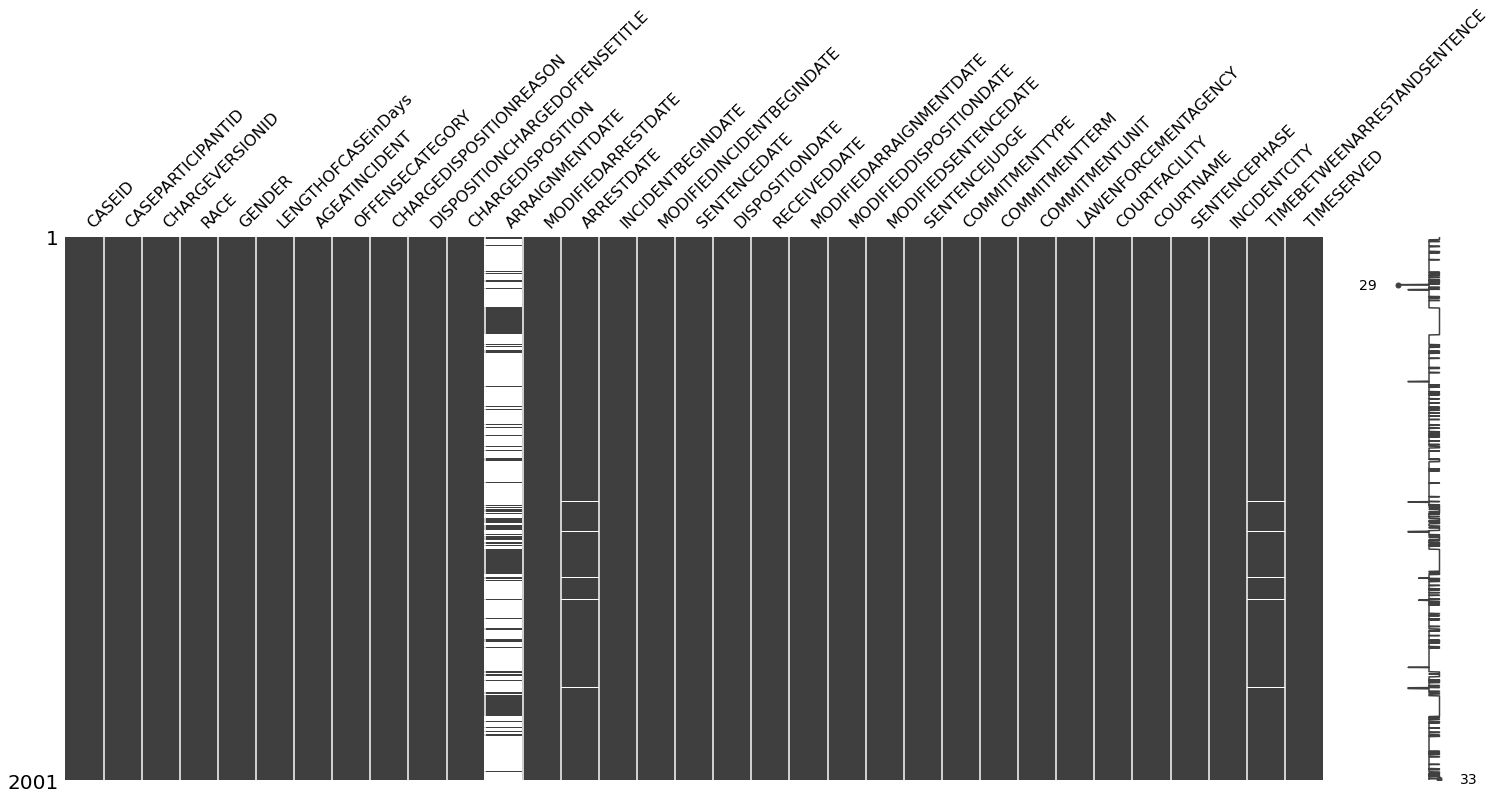

In [0]:
mn.matrix(dfModified2.loc[:2000,:])

In [0]:
dfModified2.shape

(236124, 23)

In [0]:
dfModified2.SENTENCEJUDGE.value_counts()

James B Linn          6178
Nicholas R Ford       5341
Colleen Ann Hyland    4950
Charles P Burns       4917
Thaddeus L Wilson     4478
                      ... 
John B Grogan            1
James R Epstein          1
Fred  Suria              1
Gerald T Rohrer          1
Raul  Vega               1
Name: SENTENCEJUDGE, Length: 325, dtype: int64

In [0]:
dfModified2.describe()#Need to correct extra long  and negative LENGTH and too high AGES

,CASEID,CASEPARTICIPANTID,CHARGEVERSIONID,LENGTHOFCASEinDays,AGEATINCIDENT,COMMITMENTTERM,TIMEBETWEENARRESTANDSENTENCE,TIMESERVED,TIMEBETWEENARRAIGNMNETANDSENTENCE,LENGHTOFCASEINYEARS
count,2.361240e+05,2.361240e+05,2.361240e+05,236124.000000,236124.000000,2.361240e+05,231229,236104,217334,236124.000000
mean,1.186013e+11,9.363489e+11,4.984456e+11,330.179338,32.323999,3.577287e+01,371 days 01:27:49.193293,-10 days +19:11:26.992172,-288 days +20:20:22.185207,0.904601
std,1.202110e+10,1.592721e+11,7.447036e+10,2698.793765,11.704929,5.914433e+03,754 days 22:28:50.658722,650 days 01:46:52.736365,707 days 21:46:14.517198,7.393956
min,4.467031e+10,1.206032e+11,6.745272e+10,1.000000,17.000000,0.000000e+00,-14394 days +09:42:00,-73048 days +00:00:00,-73453 days +00:00:00,0.002740
25%,1.164781e+11,9.110969e+11,4.756131e+11,103.000000,23.000000,2.000000e+00,112 days 18:42:00,0 days 00:00:00,-370 days +00:00:00,0.282192
50%,1.204560e+11,9.600354e+11,5.057682e+11,239.000000,30.000000,3.000000e+00,229 days 08:10:00,0 days 00:00:00,-176 days +00:00:00,0.654795
75%,1.246811e+11,1.015296e+12,5.395550e+11,346.000000,40.000000,1.800000e+01,445 days 16:30:00,0 days 00:00:00,-70 days +00:00:00,0.947945
max,1.311096e+11,1.099816e+12,5.896340e+11,329379.000000,86.000000,2.032012e+06,73492 days 13:25:00,73048 days 00:00:00,36475 days 00:00:00,902.408219


In [0]:
dfModified2.OFFENSECATEGORY.value_counts(dropna=False)

Narcotics                       63737
UUW - Unlawful Use of Weapon    24223
Retail Theft                    14720
Aggravated DUI                  14549
Burglary                        11625
                                ...  
Failure To Pay Child Support       13
Tampering                          13
Gambling                           12
Benefit Recipient Fraud             2
Compelling Gang Membership          2
Name: OFFENSECATEGORY, Length: 88, dtype: int64

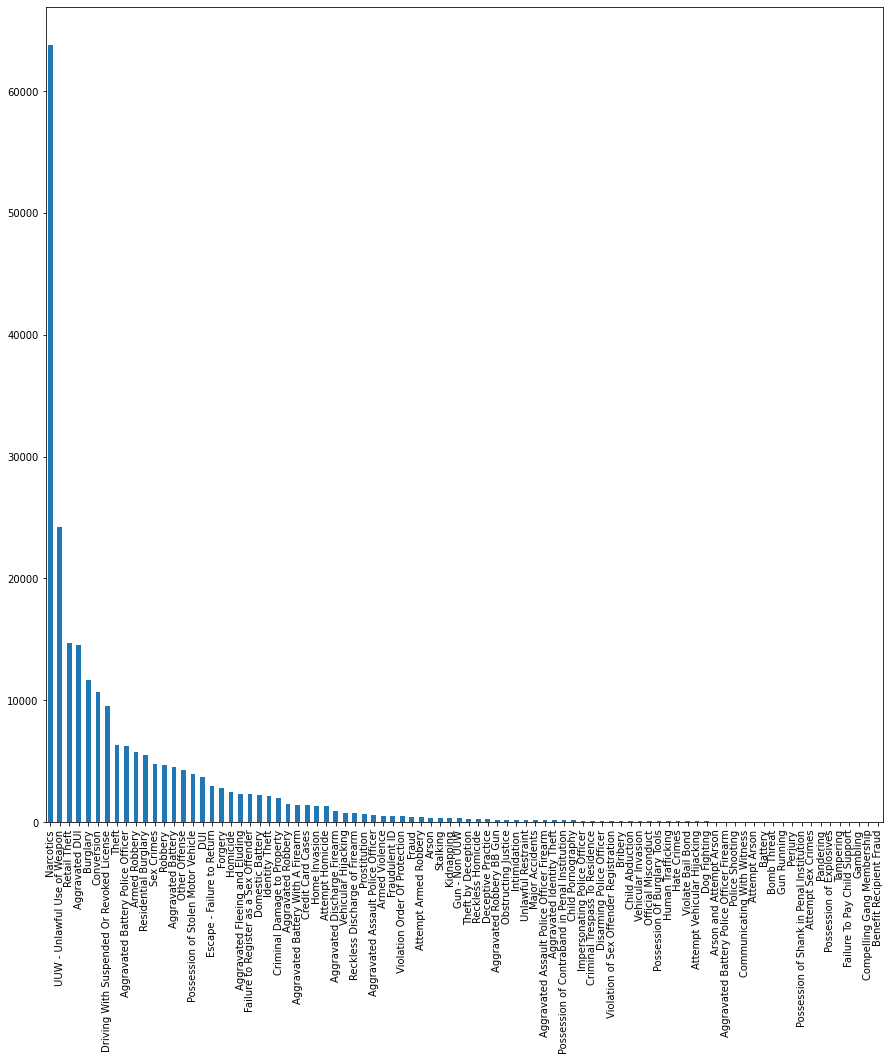

In [0]:
(dfModified2
 .OFFENSECATEGORY
 .value_counts(dropna=False)
 .plot(kind="bar", figsize=(15,15))
 )

In [0]:
dfModified.CHARGEVERSIONID.value_counts(dropna=False)#limited number of duplicate identifiers

496433120166    13
496384317753    10
466486093047     9
466527377070     7
459736994482     7
                ..
471137761886     1
508987759217     1
520799285863     1
575091870232     1
475386189875     1
Name: CHARGEVERSIONID, Length: 220786, dtype: int64

In [0]:
dfModified2.DISPOSITIONCHARGEDOFFENSETITLE.value_counts(dropna=False)

POSSESSION OF A CONTROLLED SUBSTANCE                                                                              36413
AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL                                                                 14966
RETAIL THEFT                                                                                                      13388
FELONY DRIVING WHILE DRIVER?S LICENSE, PERMIT, OR PRIVILEGE TO OPERATE A MOTOR VEHICLE IS SUSPENDED OR REVOKED    10503
AGGRAVATED UNLAWFUL USE OF WEAPON                                                                                  9689
                                                                                                                  ...  
FI INST FRAUD/FLS REP>$10K-$100K                                                                                      1
AGG DUI/PREVIOUS RECK HOMICIDE                                                                                        1
HRSMT/OBSCENE PROPOSAL/VIC <18          

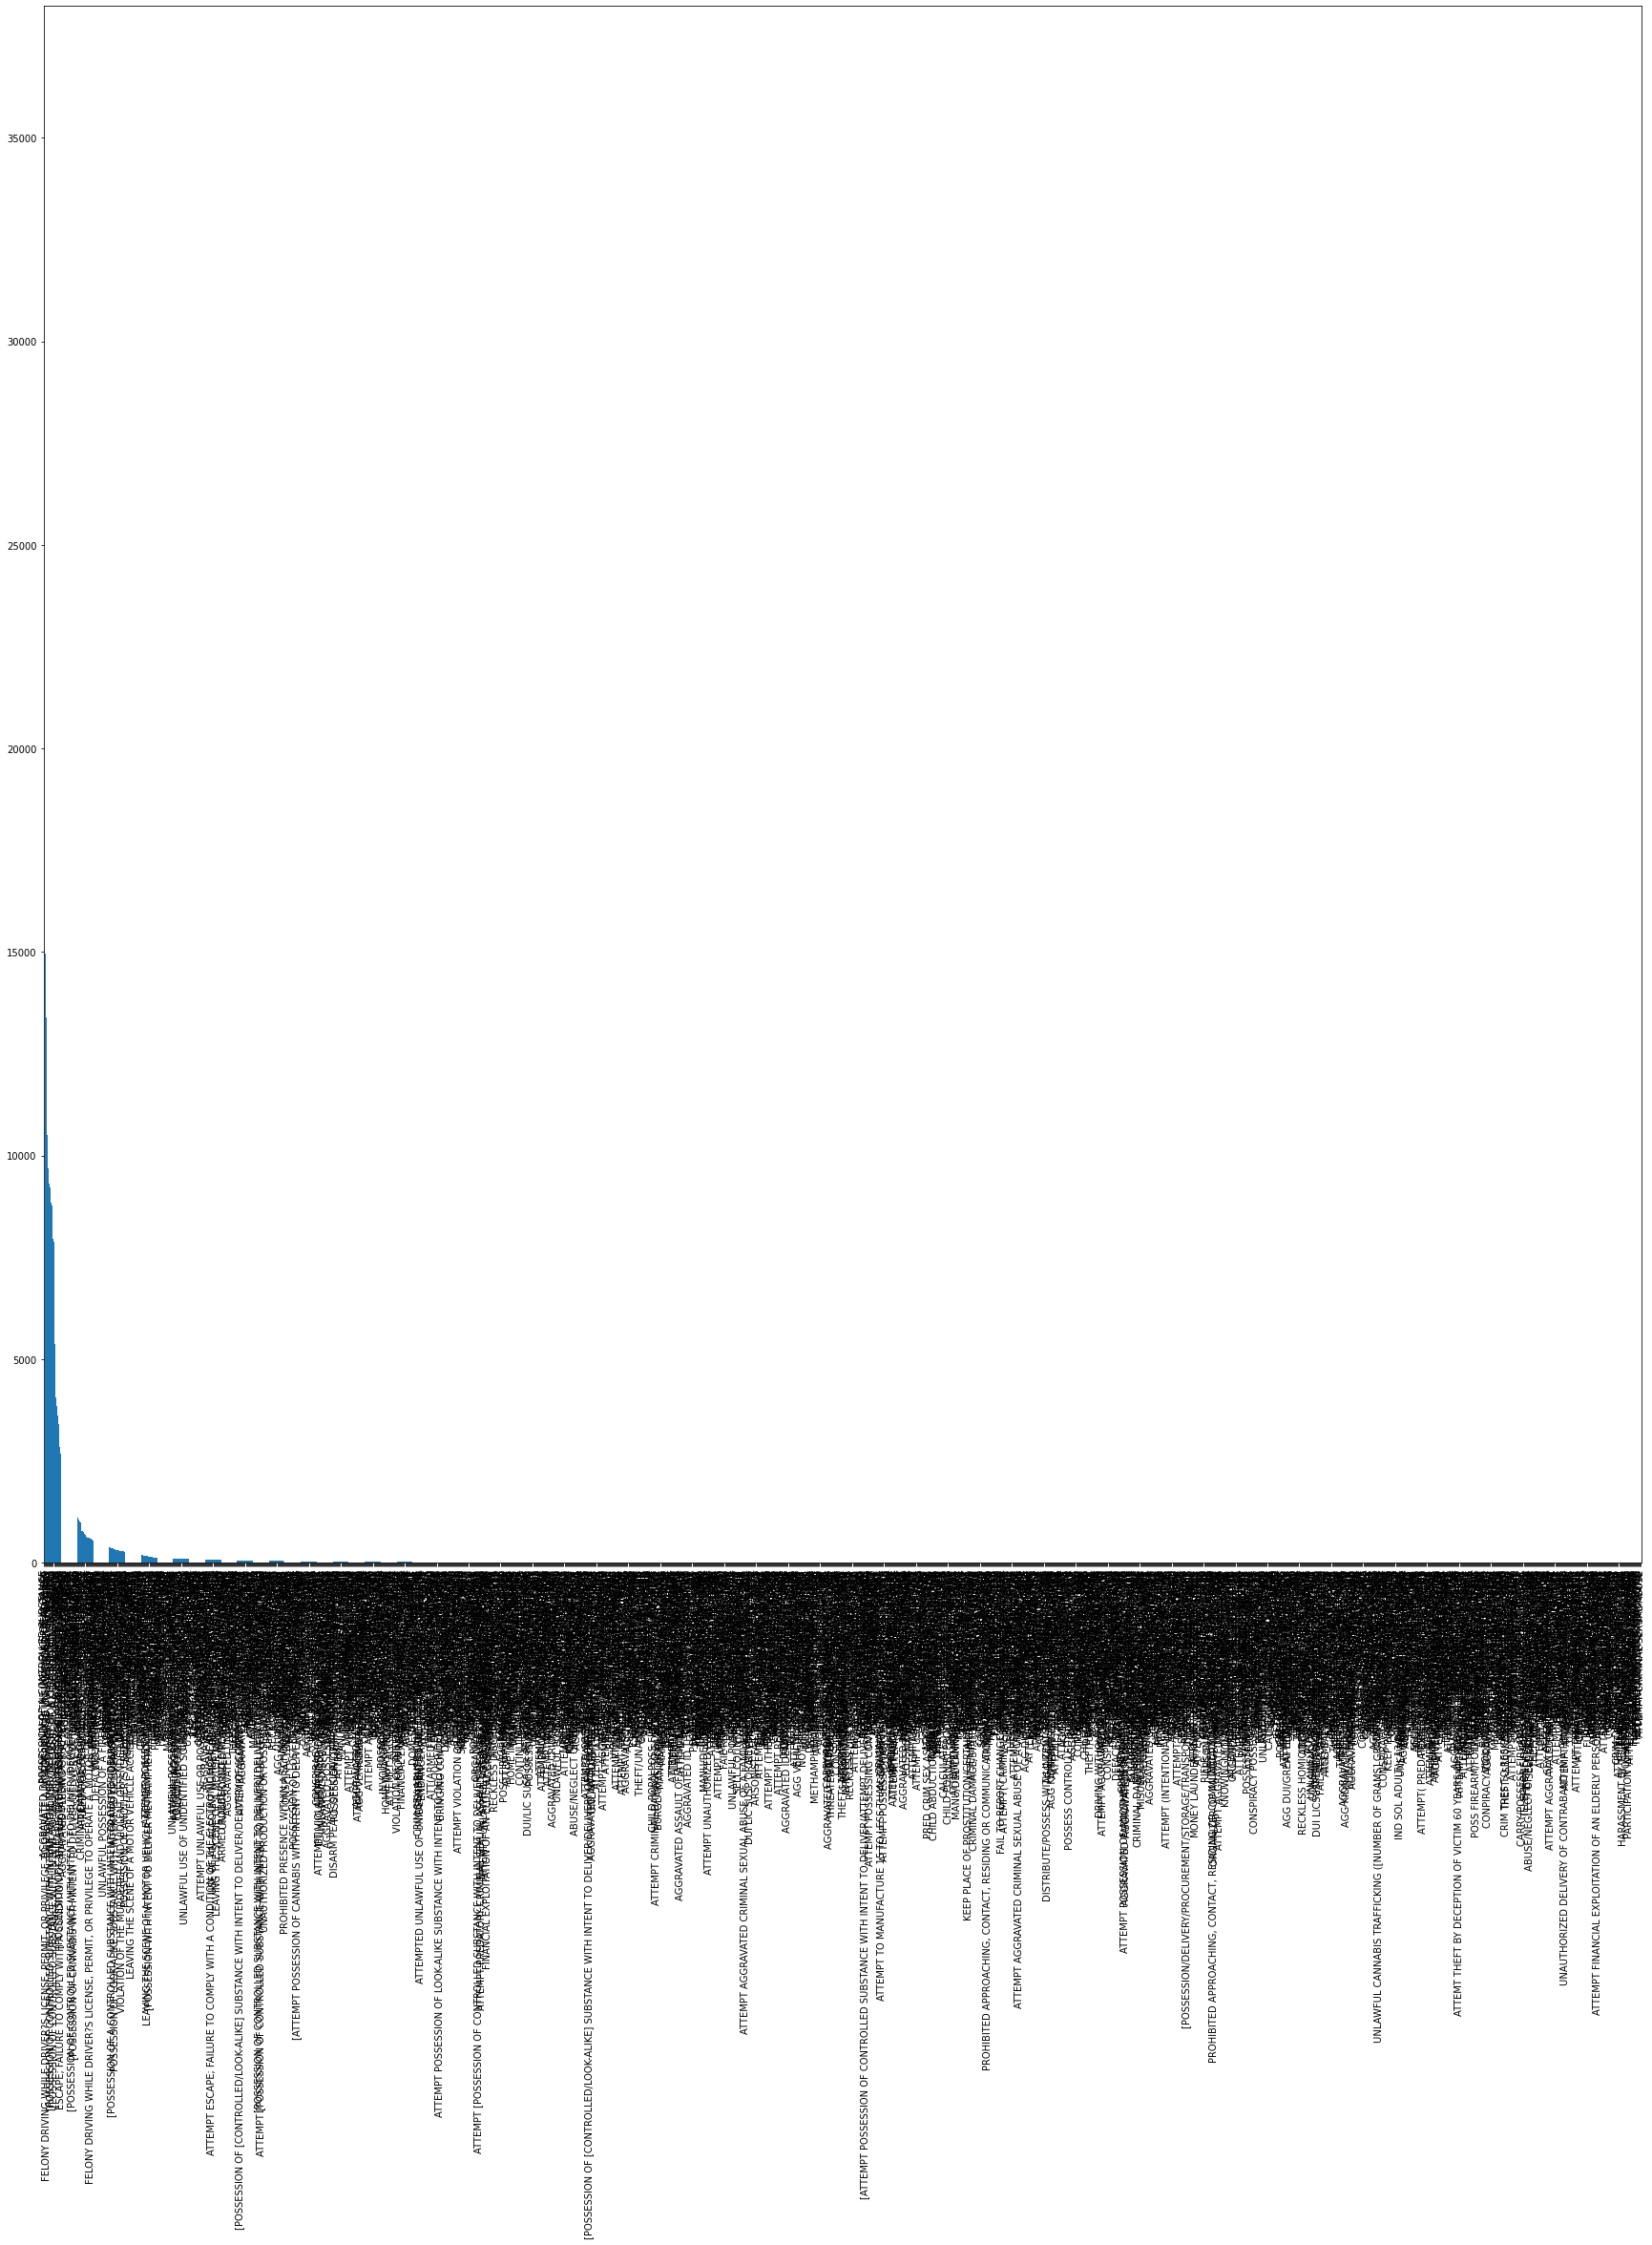

In [0]:
(dfModified2
 .DISPOSITIONCHARGEDOFFENSETITLE
 .value_counts()
 .plot(kind="bar", figsize=(30,30))
 )



In [0]:
dfModified2.CHARGEDISPOSITION.value_counts()

Plea Of Guilty                      208764
Finding Guilty                       21165
Verdict Guilty                        4507
Case Dismissed                         573
Nolle Prosecution                      509
FNG Reason Insanity                    143
Finding Not Not Guilty                 118
Charge Vacated                          60
FNG                                     46
Finding Guilty But Mentally Ill         39
Plea of Guilty - Amended Charge         35
Finding Guilty - Lesser Included        35
BFW                                     30
Plea of Guilty But Mentally Ill         30
Death Suggested-Cause Abated            17
Nolle On Remand                         13
Plea of Guilty - Lesser Included         8
Sexually Dangerous Person                7
Verdict-Not Guilty                       7
Verdict Guilty - Lesser Included         5
WOWI                                     4
SOL                                      2
Finding Guilty - Amended Charge          2
Verdict Gui

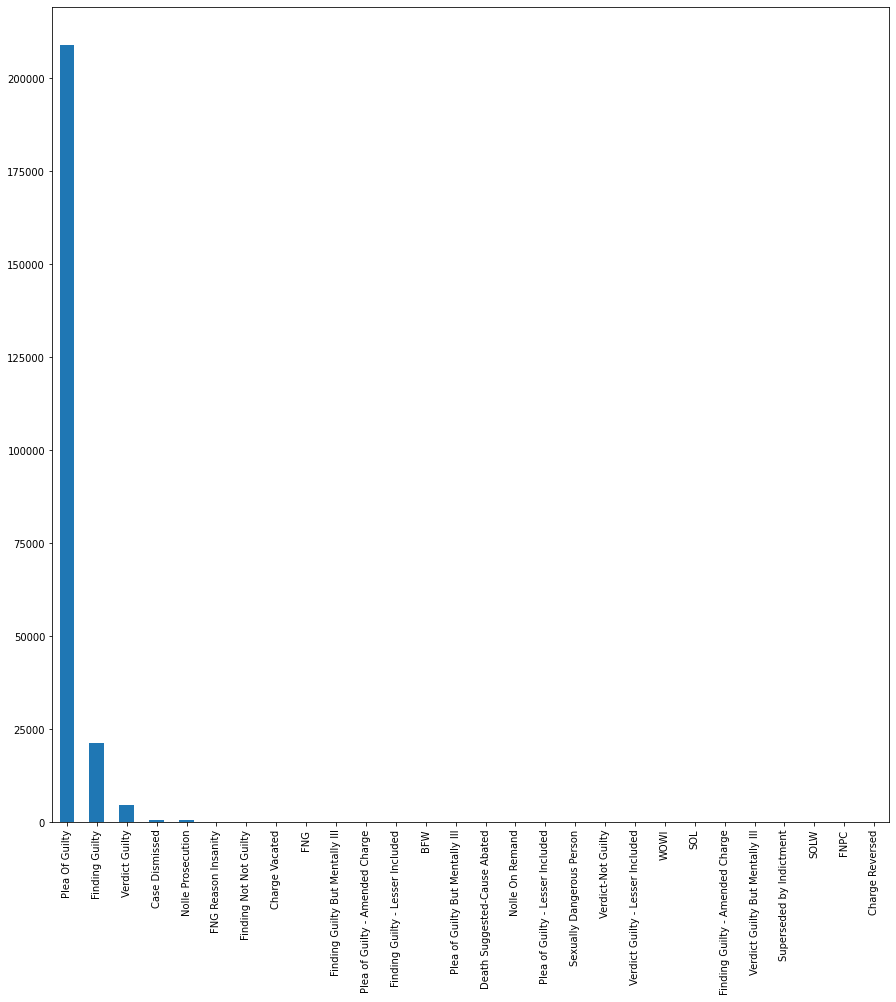

In [0]:
(dfModified2
 .CHARGEDISPOSITION
 .value_counts()
 .plot(kind="bar", figsize=(15,15))
 )

In [0]:
dfModified2.CHARGEDISPOSITIONREASON.value_counts()

Not Reported                                            235311
Drug Court Graduate                                        390
PG to Other Count/s                                        149
Mental Health Graduate                                     147
Veteran's Court Graduate                                    35
Proceeding on Other Count/s                                 32
Judgement & Conviction Vacated                              19
Adjudicated Minor                                           16
PG to Misdemeanor                                            6
Complaining Witness Not in Court                             4
Proceeding on Other Case/s                                   4
Re-Indictment                                                4
Motion to Quash Arrest & Suppress Evidence/Sustained         3
Nolle - AONIC                                                2
Deferred Prosecution Program Completed                       2
Name: CHARGEDISPOSITIONREASON, dtype: int64

In [0]:
dfModified2.GENDER.value_counts()

Male            206990
Female           28336
Not Reported       790
Other                8
Name: GENDER, dtype: int64

In [0]:
dfModified2.LENGTHOFCASEinDays.describe()#value_counts()#.hist()#eliminate negative numbers and adjust for cases more than 10 years old

count    236124.000000
mean        330.179338
std        2698.793765
min           1.000000
25%         103.000000
50%         239.000000
75%         346.000000
max      329379.000000
Name: LENGTHOFCASEinDays, dtype: float64

In [0]:
dfModified2.AGEATINCIDENT.value_counts()#.hist()#ELIMINATE LARGE AND NEGATIVE NUMBERS

19    12091
20    11349
21    11041
22    10334
23    10001
      ...  
85        5
81        4
82        4
84        2
86        1
Name: AGEATINCIDENT, Length: 69, dtype: int64

In [0]:
dfModified2.RACE.value_counts()

Black              156707
Hispanic            42677
White               33598
Not Reported         1569
Asian                1415
American Indian       123
Biracial               35
Name: RACE, dtype: int64

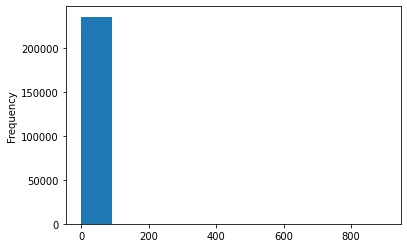

In [0]:

dfModified2.LENGHTOFCASEINYEARS.plot.hist()

In [0]:
dfModified2.LENGTHOFCASEinDays.describe()#max too high

count    241511.000000
mean        331.133304
std        2669.122181
min           1.000000
25%         104.000000
50%         240.000000
75%         349.000000
max      329379.000000
Name: LENGTHOFCASEinDays, dtype: float64

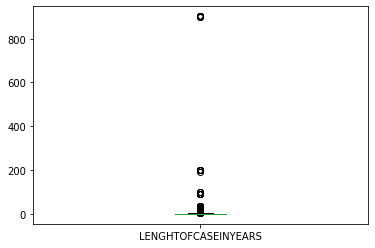

In [0]:
dfModified2.LENGHTOFCASEINYEARS.plot.box()


In [0]:
dfModified2.COMMITMENTTERM.value_counts()#need to convert to integer

2       65942
1       33548
3       21674
24      19329
18      16328
        ...  
352         1
226         1
1013        1
276         1
297         1
Name: COMMITMENTTERM, Length: 376, dtype: int64

In [0]:
dfModified2.AGEATINCIDENT.corr(dfModified2.LENGTHOFCASEinDays)

-0.005901905503214443

In [0]:
pd.pivot_table(dfModified2, values='AGEATINCIDENT', index='GENDER', aggfunc='mean')

,AGEATINCIDENT
GENDER,
Female,34.116424
Male,32.079197
Not Reported,32.125316
Other,37.125000


In [0]:
pd.pivot_table(dfModified2, values='AGEATINCIDENT', index='RACE', aggfunc='mean')

,AGEATINCIDENT
RACE,
American Indian,33.365854
Asian,34.000000
Biracial,28.742857
Black,32.139158
Hispanic,31.337207
Not Reported,33.265137
White,34.324960


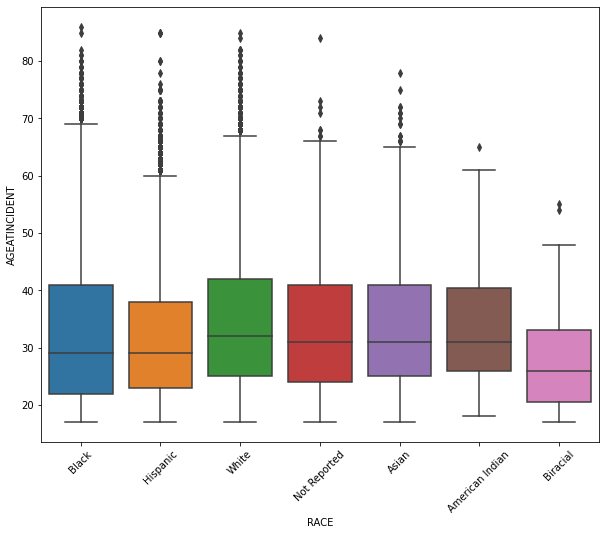

In [0]:
#sns.violinplot(x='RACE', y='AGEATINCIDENT', data=dfModified2)
fig, ax = plt.subplots(figsize=(10, 8))
ax.tick_params(axis='x', labelrotation=45)
sns.boxplot(x='RACE', y='AGEATINCIDENT', data=dfModified2, ax=ax)

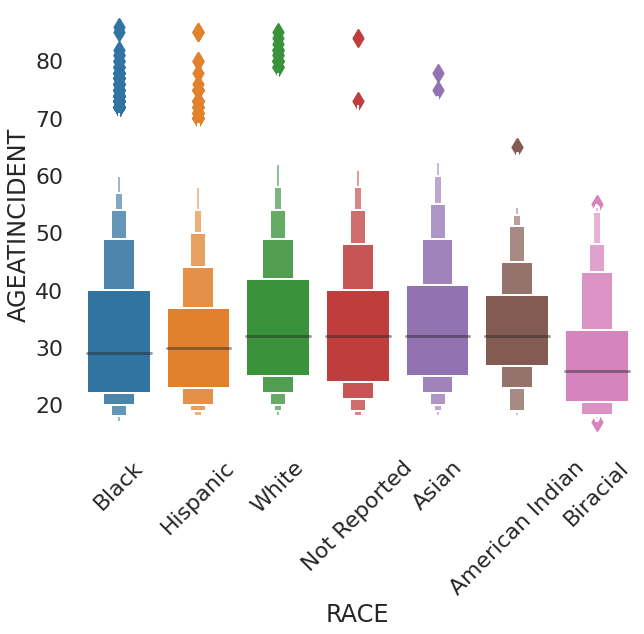

In [0]:
with sns.plotting_context('poster'):
    with sns.axes_style('dark', {'axes.facecolor':'white'}):
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.boxenplot(x='RACE', y='AGEATINCIDENT', data=dfModified2, ax=ax)
        ax.tick_params(axis='x', labelrotation=45)
fig.savefig('/tmp/box.png', dpi=300)

In [0]:
(dfModified2.AGEATINCIDENT
 .pipe(lambda df2: pd.crosstab(df2.dfModified2.GENDER, df2.dfModified2.RACE))
 .plot.bar(stacked=False)
)

AttributeError: ignored

In [0]:

ax = sns.catplot(x='AGEATINCIDENT', y='COMMITMENTTERM', data=df, kind='boxen', col='GENDET', col_wrap=2)

ValueError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


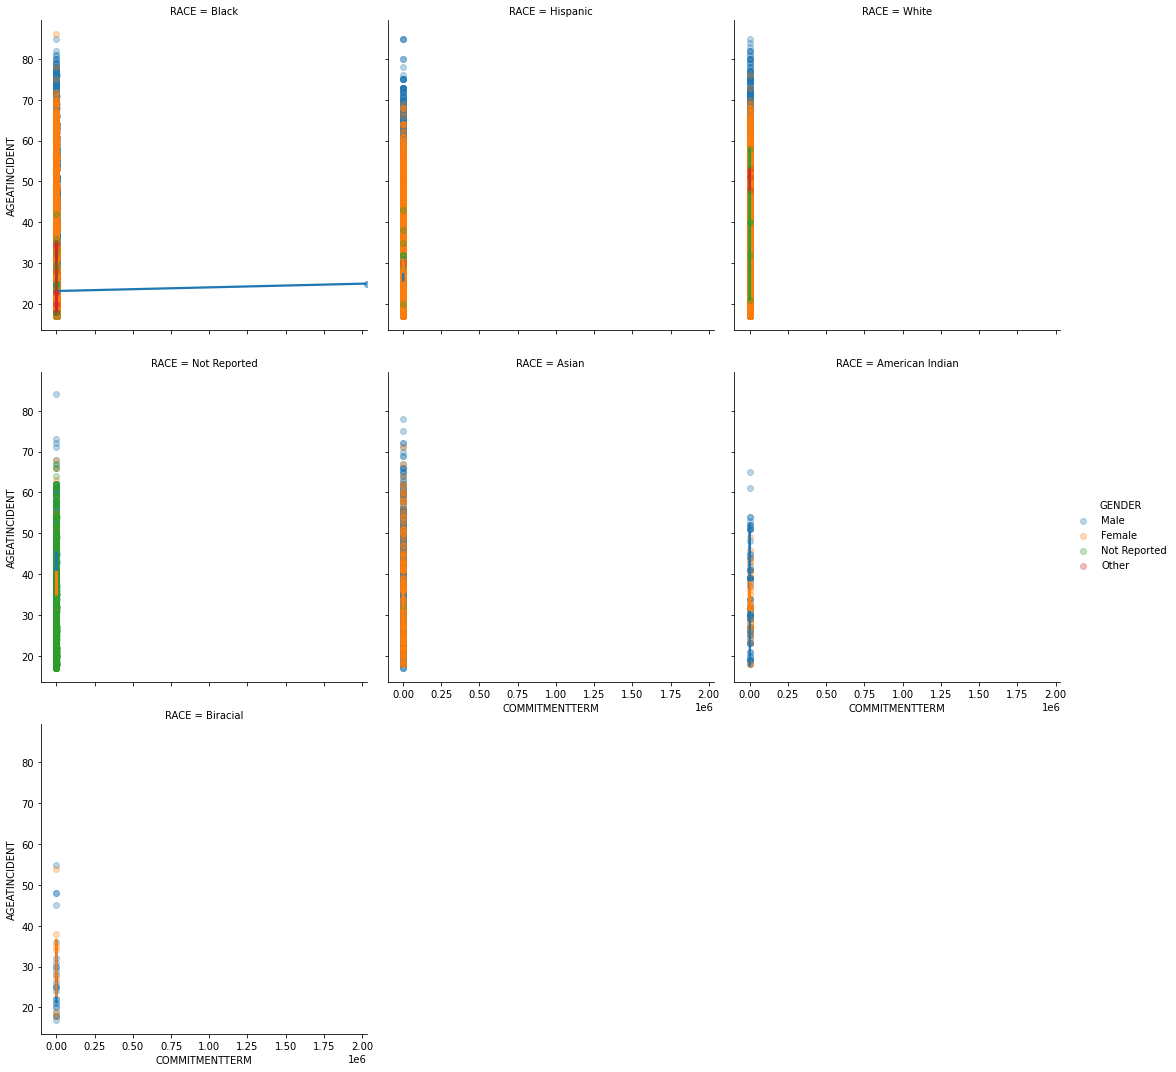

In [0]:
sns.lmplot(x='COMMITMENTTERM', y='AGEATINCIDENT', data=dfModified2, x_jitter=1, scatter_kws={'alpha':.3},
           hue='GENDER', lowess=True, col='RACE', col_wrap=3)

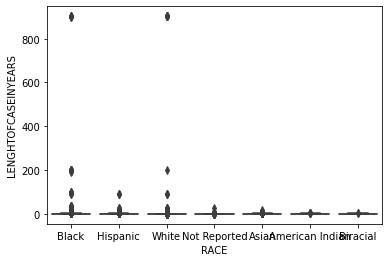

In [0]:
sns.boxplot(x='RACE', y='LENGHTOFCASEINYEARS', data=dfModified2)

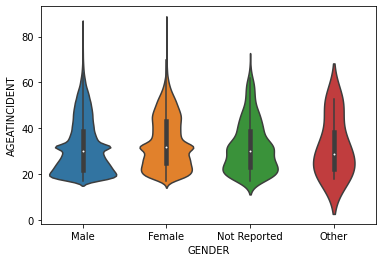

In [0]:
sns.violinplot(x='GENDER', y='AGEATINCIDENT', data=dfModified2)

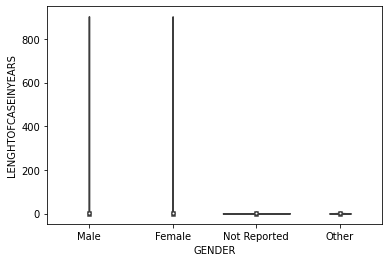

In [0]:
sns.violinplot(x='GENDER', y='LENGHTOFCASEINYEARS', data=dfModified2)

In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER,margins=True))
 
)

GENDER,Female,Male,Not Reported,Other,All
RACE,,,,,
American Indian,35,89,0,0,124
Asian,221,1228,1,0,1450
Biracial,8,27,0,0,35
Black,18526,141703,23,8,160260
Hispanic,3686,39995,9,1,43691
Not Reported,175,659,773,0,1607
White,6304,28032,5,3,34344
All,28955,211733,811,12,241511


In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER))
 .pipe(lambda dfModified2:dfModified2.div(dfModified2.sum(axis=1),axis=0))
  .mul(100)
)

GENDER,Female,Male,Not Reported,Other
RACE,,,,
American Indian,28.455285,71.544715,0.000000,0.000000
Asian,14.982332,84.946996,0.070671,0.000000
Biracial,22.857143,77.142857,0.000000,0.000000
Black,11.572553,88.410218,0.014677,0.002553
Hispanic,8.435457,91.541111,0.021089,0.002343
Not Reported,11.217336,40.854047,47.928617,0.000000
White,18.364188,81.612001,0.014882,0.008929


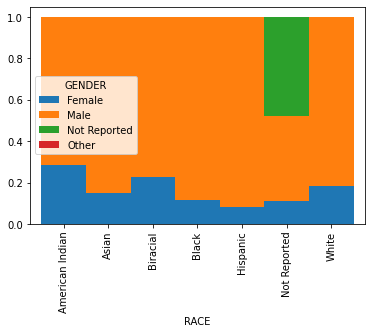

In [0]:
#gender=['Female','Male','Other','Not Reported']
#race=['American Indian','Asian','Biracial','Black','Hispanic','Not Reported','White']
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER))
 .pipe(lambda dfModified2:dfModified2.div(dfModified2.sum(axis=1),axis=0))
 #.loc[gender,race]
 .plot.bar(width=1,stacked=True)
)

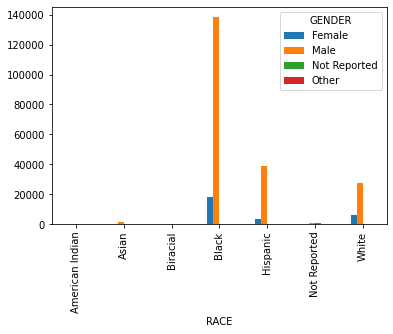

In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.GENDER))
 .plot.bar(stacked=False)
)

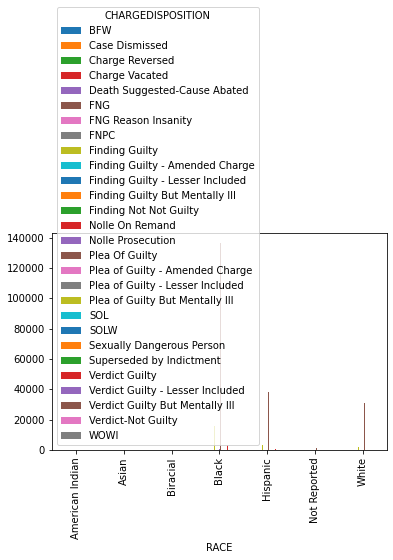

In [0]:
(dfModified2
 .pipe(lambda dfModified2: pd.crosstab(dfModified2.RACE, dfModified2.CHARGEDISPOSITION))
 .plot.bar(stacked=False)
)

In [0]:
(dfModified2
  .groupby('SENTENCEJUDGE')
  .agg({'CASEPARTICIPANTID':'first','OFFENSECATEGORY':'first','DISPOSITIONCHARGEDOFFENSETITLE':'first','AGEATINCIDENT':'mean','LENGTHOFCASEinDays':'mean'})
)

,CASEPARTICIPANTID,OFFENSECATEGORY,DISPOSITIONCHARGEDOFFENSETITLE,AGEATINCIDENT,LENGTHOFCASEinDays
SENTENCEJUDGE,,,,,
Adam Donald Bourgeois,890712251521,Domestic Battery,DOMESTIC BATTERY,22.000000,522.000000
Adrienne Davis,905052197008,Driving With Suspended Or Revoked License,DRIVING ON SUSPENDED LICENSE,52.327586,288.672414
Aleksandra Gillespie,253972073595,Conversion,AGG DUI/NO VALID DL,48.162791,386.790698
Alfred L Levinson,878623893465,Residential Burglary,RESIDENTIAL BURGLARY,27.153846,403.153846
Alfredo Maldonado,216026575540,Conversion,DUI/LIC SUSP OR REVOKED THIRD(EFFECTIVE 1-1-1999),45.004113,440.992288
...,...,...,...,...,...
William J Kunkle,270058341944,Conversion,POSS AMT CON SUB EXCEPT (A)/(D),35.547382,334.432074
William O Maki,907023068872,Narcotics,POSSESSION OF A CONTROLLED SUBSTANCE,33.000000,1000.000000
William Stewart Boyd,911517566644,Narcotics,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,29.666667,141.000000


In [0]:
(dfModified2
  .groupby('GENDER')
  .agg({'CASEPARTICIPANTID':'first','OFFENSECATEGORY':'first','DISPOSITIONCHARGEDOFFENSETITLE':'last','AGEATINCIDENT':'mean','LENGTHOFCASEinDays':'mean'})
)

,CASEPARTICIPANTID,OFFENSECATEGORY,DISPOSITIONCHARGEDOFFENSETITLE,AGEATINCIDENT,LENGTHOFCASEinDays
GENDER,,,,,
Female,270058341944,Conversion,AGGRAVATED BATTERY,47.576052,315.057065
Male,218297158761,Conversion,VIOLATION OF THE SEX OFFENDER REGISTRATION ACT,44.310986,369.392642
Not Reported,213226455353,Conversion,RECKLESS CONDUCT,86.039241,507.181013
Other,878320429853,Aggravated DUI,POSSESSION OF A CONTROLLED SUBSTANCE,37.125000,362.000000


In [0]:
dfModified2.drop_duplicates(subset='CASEPARTICIPANTID').shape

(201181, 35)

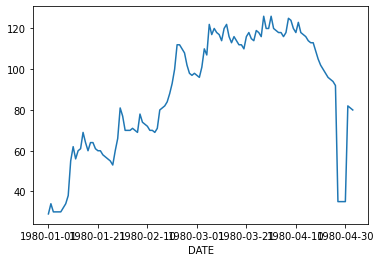

In [0]:
(df
 .assign(SNWD=df.SNWD.fillna(df.SNWD.mean()))
 .loc[0:123]
 .set_index('DATE')
 .SNWD
 .plot()
 )

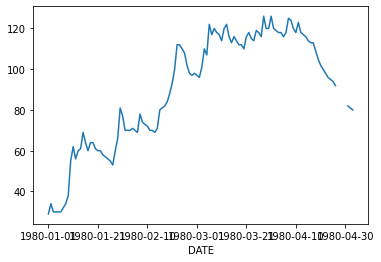

In [0]:
(df
 #.assign(SNWD=df2.SNWD.ffill())
 .loc[0:123]
 .set_index('DATE')
 .SNWD
 .plot()
 )

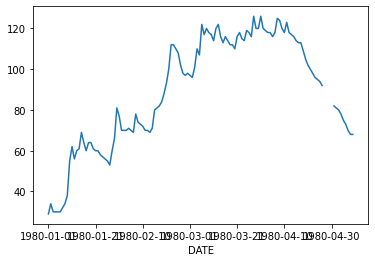

In [0]:
df.set_index('DATE').SNWD.iloc[:130].plot()

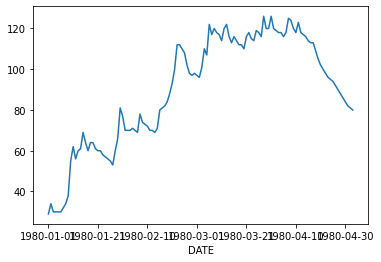

In [0]:
(df
 .assign(SNWD=df.SNWD.fillna(df.SNWD.interpolate()))
 .loc[0:123]
 .set_index('DATE')
 .SNWD
 .plot()
 )

In [0]:
def tweak_CC1(dfModified):
       
    RACE = (dfModified.RACE
      .fillna('Not Reported')
      .replace({'White [Hispanic or Latino]':'Hispanic','White/Black [Hispanic or Latino]':'Hispanic','Unknown':'Not Reported','ASIAN':'Asian','HISPANIC':'Hispanic'})    
    )   
    AGEATINCIDENT = (dfModified.AGEATINCIDENT
      .fillna(value=dfModified['AGEATINCIDENT'].mean())
      .where(lambda s:s>0,dfModified2['AGEATINCIDENT'].mean())
      .where(lambda s:s<90,dfModified2['AGEATINCIDENT'].mean())
      .astype(int)
      .rename('AGEATINCIDENT')
    )
    GENDER=(dfModified.GENDER
      .fillna('Not Reported')
      .replace({'Male name, no gender given':'Other','Unknown':'Other','Unknown Gender':'Other'})
    )
    OFFENSECATEGORY=(dfModified.OFFENSECATEGORY
      .fillna('Not Reported')
      .replace({'PROMIS Conversion':'Conversion'})
    )
    DISPOSITIONCHARGEDOFFENSETITLE=(dfModified.DISPOSITIONCHARGEDOFFENSETITLE
      .fillna('Not Reported') 
    )
    CHARGEDISPOSITION=(dfModified.CHARGEDISPOSITION
      .fillna('Not Reported')
    )
    CHARGEDISPOSITIONREASON=(dfModified.CHARGEDISPOSITIONREASON
      .fillna('Not Reported')  
    )
    SENTENCEJUDGE=(dfModified.SENTENCEJUDGE
      .fillna('Other Judge')
    ) 
    COMMITMENTTYPE=(dfModified.COMMITMENTTYPE
      .fillna('Not Reported')
    ) 
    COMMITMENTUNIT=(dfModified.COMMITMENTUNIT
      .replace({'Months':'Years','Term':'Years','Natural Life':'Years','Dollars':'Years','Hours':'Years','Weeks':'Years', 'Days':'Years','Pounds':'Years','Ounces':'Years','Kilos':'Years'})        
      .fillna('Years')
    )
    COMMITMENTTERM=(dfModified.COMMITMENTTERM
      .replace({'24 wrap':24,'two':2,'months':'',',':'','`':'','1,154.00':1154,'7.5':8},regex=True)
      .fillna(1000)
      .astype(float)
      .round(0)
      .astype(int)
      #.fillna(value=dfModified['COMMITMENTTERM'].mean()) 
    ) 
    LAWENFORCEMENTAGENCY=(dfModified.LAWENFORCEMENTAGENCY       
      .fillna('Other Agency')
    ) 
    INCIDENTCITY=(dfModified.INCIDENTCITY      
      .fillna('Other City')
    ) 
    SENTENCEPHASE=(dfModified.SENTENCEPHASE      
      .fillna('Original Sentencing')
    ) 
    COURTNAME=(dfModified.COURTNAME      
      .fillna('Not Reported')
    ) 
    COURTFACILITY=(dfModified.COURTFACILITY     
      .fillna('Not Reported')
    ) 
    CHARGEVERSIONID=(dfModified.CHARGEVERSIONID     
      .fillna(99999999999)
    ) 
    LENGTHOFCASEinDays=(dfModified.LENGTHOFCASEinDays     
      .fillna(value=dfModified['LENGTHOFCASEinDays'].mean())
      .astype(int)
      .where(lambda s:s>0,dfModified2['LENGTHOFCASEinDays'].mean())
    ) 
    ARRESTDATE=(dfModified.ARRESTDATE     
      .fillna(1/15/2012)
      .replace({'NaT':1/15/2012})
    )
    ARRAIGNMENTINDATE=(dfModified.ARRAIGNMENTDATE     
      .fillna('5/25/2003 12:00:00 AM')
      .replace({'NaT':'5/25/2003 12:00:00 AM'})
    )
    DISPOSITIONDATE=(dfModified.DISPOSITIONDATE     
      .fillna('5/25/2003 12:00:00 AM')
      .replace({'NaT':'5/25/2003 12:00:00 AM'})   
    ) 
    SENTENCEDATE=(dfModified.SENTENCEDATE     
      .fillna('5/25/2003 12:00:00 AM')
      .replace({'NaT':'5/25/2003 12:00:00 AM'})   
    ) 
    INCIDENTBEGINDATE=(dfModified.INCIDENTBEGINDATE     
      .fillna(3333)#Not working
    ) 
    CASEID=(dfModified.CASEID     
      .fillna(3333)#Not working
    )
    CASEPARTICIPANTID=(dfModified.CASEPARTICIPANTID     
      .fillna(3333)#Not working
    )
    MODIFIEDARRESTDATE=(dfModified.ARRESTDATE     
      .fillna(1/15/2012)#Not working
      .replace({'NaT':1/15/2012})
      .rename('MODIFIEDARRESTDATE')
    )
    MODIFIEDINCIDENTBEGINDATE=(dfModified.INCIDENTBEGINDATE     
      .fillna('5/25/2003 12:00:00 AM')#Not working
      .replace({'NaT':'5/25/2003 12:00:00 AM'})
      .rename('MODIFIEDINCIDENTBEGINDATE')
    )
    MODIFIEDARRAIGNMENTINDATE=(dfModified.ARRAIGNMENTDATE     
      .fillna('5/25/2003 12:00:00 AM')#Not working
      .replace({'NaT':'5/25/2003 12:00:00 AM'})
      .rename('MODIFIEDARRAIGNMENTDATE')
    )
    MODIFIEDSENTENCEDATE=(dfModified.SENTENCEDATE     
      .fillna('5/25/2003 12:00:00 AM')#Not working
      .replace({'NaT':'5/25/2003 12:00:00 AM'})
      .rename('MODIFIEDSENTENCEDATE')
    )
    MODIFIEDDISPOSITIONDATE=(dfModified.DISPOSITIONDATE     
      .fillna('5/25/2003 12:00:00 AM')#Not working
      .replace({'NaT':'5/25/2003 12:00:00 AM'})
      .rename('MODIFIEDDISPOSITIONDATE')
    )
    
    ARRESTDATE=pd.to_datetime(dfModified.ARRESTDATE, errors='coerce')
    ARRAIGNMENTDATE=pd.to_datetime(dfModified.ARRAIGNMENTDATE, errors='coerce')
    RECEIVEDDATE=pd.to_datetime(dfModified.RECEIVEDDATE, errors='coerce')
    INCIDENTBEGINDATE=pd.to_datetime(dfModified.INCIDENTBEGINDATE, errors='coerce')
    DISPOSITIONDATE=pd.to_datetime(dfModified.DISPOSITIONDATE, errors='coerce')
    SENTENCEDATE=pd.to_datetime(dfModified.SENTENCEDATE, errors='coerce')
    #MODIFIEDARRESTDATE = pd.to_datetime(df['MODIFIEDARRESTDATE'], dayfirst=True)
    #MODIFIEDARRESTDATE=pd.to_datetime(dfModified.MODIFIEDARRESTDATE, errors='coerce')
    

    return pd.concat([CASEID,CASEPARTICIPANTID,CHARGEVERSIONID,
                      RACE,GENDER,LENGTHOFCASEinDays,AGEATINCIDENT,
                      OFFENSECATEGORY,CHARGEDISPOSITIONREASON,DISPOSITIONCHARGEDOFFENSETITLE,CHARGEDISPOSITION,
                      ARRAIGNMENTDATE,MODIFIEDARRESTDATE,ARRESTDATE,INCIDENTBEGINDATE,MODIFIEDINCIDENTBEGINDATE, 
                      SENTENCEDATE,DISPOSITIONDATE,RECEIVEDDATE,MODIFIEDARRAIGNMENTINDATE,MODIFIEDDISPOSITIONDATE,MODIFIEDSENTENCEDATE,
                      SENTENCEJUDGE,COMMITMENTTYPE,COMMITMENTTERM,
                      COMMITMENTUNIT,LAWENFORCEMENTAGENCY,COURTFACILITY,COURTNAME,SENTENCEPHASE,INCIDENTCITY], axis=1)
     
dfModified2 = tweak_CC1(dfModified)

NameError: ignored